<a href="https://colab.research.google.com/github/tawfiqam/bertLDA/blob/main/Topic2VecParenting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#moving logging to a file
import logging
import logging.handlers
log = logging.getLogger(__name__)
log.addHandler(logging.StreamHandler())  # Prints to console.
log.addHandler(logging.handlers.RotatingFileHandler('logfile2.log'))
log.setLevel(logging.INFO)  # Set logging level here.

In [7]:
%load_ext autotime

time: 358 µs


In [8]:
from top2vec import Top2Vec
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000
pd.set_option('display.max_colwidth', -1)

time: 1.58 ms


<ipython-input-8-8a634e36a2df>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [10]:
df = pd.read_json('Parenting_comments_2020.json')

time: 12.6 s


In [11]:
len(df.id)

240826

time: 2.7 ms


In [12]:
len(df.id.unique())

240826

time: 90.2 ms


In [ ]:
#there are no duplicates
duplicateRowsDF = df[df.duplicated(['id'])]
len(duplicateRowsDF)
df = df.drop_duplicates(subset=['id'])

In [13]:
df.created_utc = pd.to_datetime(df.created_utc,unit='s')
df = df.set_index('created_utc')

time: 196 ms


In [14]:
docs = df.body.values

time: 778 µs


In [15]:
model = Top2Vec(documents=docs, speed="learn", workers=20, verbose=True, min_count=50, keep_documents=True, document_ids=df.id)

2020-10-21 16:27:56,326 - top2vec - INFO - Pre-processing documents for training
2020-10-21 16:28:33,960 - top2vec - INFO - Creating joint document/word embedding
2020-10-21 17:13:38,661 - top2vec - INFO - Creating lower dimension embedding of documents
2020-10-21 17:16:27,271 - top2vec - INFO - Finding dense areas of documents
2020-10-21 17:16:45,163 - top2vec - INFO - Finding topics


time: 48min 56s


In [16]:
model.save('Parenting_2020_top2vec.model')

time: 3.61 s


In [ ]:
model_loaded = Top2Vec.load("foster_130_Oct_19.model")

FileNotFoundError: ignored

In [17]:
model.get_num_topics()

2605

time: 2.42 ms


In [18]:
topic_sizes, topic_nums = model.get_topic_sizes()

time: 794 µs


In [19]:
topic_nums

array([   0,    1,    2, ..., 2602, 2603, 2604])

time: 2.33 ms


In [20]:
topic_sizes

array([1565, 1277, 1130, ...,   16,   13,    8])

time: 2.28 ms


In [21]:
sum(topic_sizes)

240826

time: 2.85 ms


In [ ]:
list_of_topic_df = []
i = 0
for topic in topic_nums:
  documents, doc_scores, doc_id = model.search_documents_by_topic(topic,topic_sizes[i],return_documents=True,reduced=False)
  topic_dataframe = pd.DataFrame({'id':doc_id,'score'+str(topic):doc_scores})
  list_of_topic_df.append(topic_dataframe)
  i+=1

In [ ]:
list_of_topic_df[0]

id    score0
0    fioqcr9  0.850178
1    fhnm5hn  0.819400
2    fjc537q  0.801882
3    fcuzrq8  0.782572
4    fo17ba3  0.778075
5    fquq1sa  0.771431
6    fl83xi5  0.764532
7    fg0vwl4  0.756593
8    fml18p2  0.756156
9    fph3llk  0.755786
10   fr2gnjl  0.755134
11   ff9gz78  0.754196
12   ffh018u  0.747401
13   fjbqb8g  0.746996
14   fk5e63b  0.745494
15   fr1jdm0  0.744750
16   fdp9dcg  0.743030
17   fk3rojk  0.742407
18   fkgjfro  0.741661
19   fgsozhi  0.740492
20   fjcum8k  0.739335
21   fpid0js  0.737383
22   fmf193z  0.730928
23   ff4i812  0.730128
24   fhratco  0.729649
25   fhkqb8a  0.728846
26   fg357pp  0.727475
27   fhfsk86  0.726484
28   fi4cvow  0.725796
29   ffi22co  0.725581
30   fjnwwnt  0.725438
31   fjltjrg  0.723499
32   fjfht71  0.723238
33   fly1bdr  0.720645
34   fqrnoz0  0.720298
35   fqyinj8  0.718983
36   frdy42x  0.717791
37   fpz40xd  0.715411
38   fjes52l  0.715357
39   fmzs5gx  0.715125
40   ff4dn31  0.713729
41   fhjt4iw  0.713184
42   feffzm1  0.711770
43   fgo0y7p  0.710602
44   fdnsim5  0.710253
45   foy5x90  0.709048
46   fnitmxp  0.708915
47   fqzdamt  0.708865
48   ff4q41e  0.708728
49   fp641zy  0.707869
50   fea22ug  0.707676
51   fhyowb5  0.706710
52   ff3ke5b  0.706089
53   fdni347  0.705123
54   fkelzf9  0.703880
55   fjy39sc  0.703647
56   fnyfym9  0.703565
57   fo3rdc9  0.703087
58   ffiwi3e  0.701460
59   fjk8zna  0.701308
60   fnbeogl  0.699354
61   ff9mvxr  0.698868
62   foow8sd  0.698705
63   fddt4oc  0.697132
64   fffw0g8  0.696213
65   fj544hj  0.696172
66   fjwmz6m  0.694477
67   fochuou  0.694471
68   fpggzz7  0.694027
69   fjn875k  0.694024
70   fmemqbw  0.692857
71   ffjensp  0.692825
72   fddlclj  0.692613
73   fiqxi3w  0.691986
74   fn1dl2v  0.691948
75   fjhvy2a  0.691085
76   fpalva7  0.691049
77   fpy7o64  0.689653
78   fldp9lu  0.688794
79   fq971em  0.687549
80   fqqbj93  0.686540
81   ff4i3py  0.685932
82   fiivn3x  0.685847
83   fj5mma4  0.684483
84   fpknubq  0.684479
85   fk3wdxw  0.684169
86   fnwunoi  0.684032
87   fcwhw5q  0.683791
88   febaov1  0.683318
89   fpqla55  0.682909
90   fjmdgpj  0.680881
91   fjlqw0g  0.679913
92   fjlln3d  0.679431
93   fphy0c8  0.679330
94   fkq1rd7  0.679261
95   fjcxh0a  0.679012
96   ff4long  0.678167
97   fnisckm  0.678001
98   frgy7qe  0.677858
99   fjehwr1  0.677229
100  fmzb4uj  0.676801
101  fji12lp  0.675902
102  fq809mu  0.675078
103  fphyd2u  0.674937
104  fhpo8dv  0.674877
105  fpkhzt3  0.674433
106  fhqvoyn  0.674157
107  fpm5d28  0.673432
108  fi681z8  0.672977
109  fkfchuh  0.672858
110  fnbjm3r  0.672705
111  fl2pjel  0.672511
112  fddas0r  0.671954
113  fo1v6ho  0.671220
114  fqhl1sg  0.670322
115  fkntl2c  0.670148
116  fgzt3km  0.670002
117  fkj2n91  0.669992
118  fimrb4d  0.669228
119  fdxzijx  0.668809
120  fheahoq  0.668206
121  fkrs9ty  0.668202
122  fji9awo  0.666817
123  fplab17  0.665656
124  fdzusf6  0.665342
125  fqokjnz  0.665018
126  fnxadlw  0.663928
127  fpfdmxw  0.663741
128  fqved8z  0.663545
129  fl63wsn  0.662446
130  fh1ublr  0.661918
131  fr183p6  0.661861
132  fgncekb  0.661756
133  fo5uaup  0.661708
134  fp4n18w  0.661478
135  fk7e5im  0.661447
136  fqoin8r  0.660359
137  fplvnin  0.660296
138  fipi4ys  0.657927
139  fjeth5k  0.655939
140  fjiuov1  0.654790
141  fjlwhg3  0.654106
142  fjhvkgx  0.654038
143  fjf74la  0.653325
144  ffpnz5j  0.652852
145  fo894b3  0.652024
146  fp4ewma  0.651827
147  fjcxqoz  0.651770
148  ff4g6ya  0.650873
149  fnfz99z  0.650797
150  fjloz3e  0.650540
151  fl6062j  0.650008
152  fi5069q  0.649039
153  fnto0hk  0.648250
154  fqyj6by  0.648158
155  ffo4lwv  0.647843
156  fnhquqd  0.647842
157  fi2d8e6  0.647472
158  fjm6qa4  0.647283
159  fqsa9jn  0.647004
160  fmblo1a  0.645290
161  fo17fu7  0.645036
162  fqb4i88  0.644681
163  fr1ce9t  0.644455
164  fr6v24l  0.642624
165  fnxbrbi  0.641340
166  frhdmav  0.641301
167  fjexotn  0.640729
168  flpmx0e  0.640621
169  fg0xfua  0.640504
170  fjo2jog  0.640057
171  fi3a271  0.639116
172  fo7ehzo  0.638879
173  fqd

In [ ]:
df_copy = df.copy()

In [ ]:
for df_ in list_of_topic_df:
    df_copy = pd.merge(df_copy,df_, on='id',how='outer')

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df_copy = df_copy.fillna(0)

In [ ]:
df_copy[df_copy['score0']>0.7].body

67       What does the self harm usually look like? Getting hurt during panic attacks? Grand/angry displays that include injuries with weapons? Hiding smaller injuries with nails/bruising/repetitive motions?                                                                                                                                                                                                                      
298      Does she have a therapist? It sounds like the family doesn't have a lot of motivation to change their behavior so the most you can do is try to support her emotional processing.                                                                                                                                                                                                                                           
343      Follow up? I hope peace and courage for your household. Stress is a strain on compassion and forgiveness. I would know from the pain I've experienc

In [ ]:
df_copy.to_json('Tag2TopFoster.json')

In [ ]:
topic_words, word_scores, topic_nums = model.get_topics()

In [ ]:
topic_words[0]

array(['congrats', 'encouragement', 'flair', 'viewpoint', 'mod', 'mama',
       'congratulations', 'sharing', 'dating', 'exciting', 'timeline',
       'forum', 'annoyed', 'honeymoon', 'utm_name', 'insight', 'iossmf',
       'adoptuskids', 'hopeful', 'infertility', 'savior', 'ref',
       'ex_foster', 'fc', 'cross', 'fosterparents', 'thank',
       'constructive', 'joy', 'podcast', 'expressed', 'subs',
       'suggesting', 'apologize', 'racist', 'glad', 'subreddit', 'daddy',
       'problematic', 'ios_app', 'mommy', 'reached', 'racism', 'channel',
       'introduce', 'male', 'privately', 'wise', 'rude', 'listening'],
      dtype='<U15')

In [ ]:
reduced = model.hierarchical_topic_reduction(num_topics=15)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
reduced

[[42,
  76,
  117,
  146,
  105,
  38,
  96,
  138,
  39,
  53,
  50,
  115,
  26,
  109,
  151,
  17,
  77,
  122,
  137,
  131,
  56,
  25,
  130,
  21,
  145,
  29,
  112,
  116,
  43,
  58,
  123,
  79,
  47,
  27,
  28,
  139,
  45,
  127,
  46,
  124,
  106,
  114,
  66,
  65,
  144,
  51,
  64,
  63,
  54,
  72,
  68,
  61,
  67,
  82,
  84,
  71,
  73,
  98,
  104,
  94,
  108,
  102,
  119,
  101,
  125,
  129,
  136,
  148,
  8],
 [31, 60, 70, 91, 1],
 [85, 59, 16, 4, 36, 107, 3],
 [30, 120, 37, 89, 133, 20, 44, 81, 55, 143, 14],
 [10, 15, 152, 24, 41, 103, 121, 6],
 [128, 5, 92, 2],
 [48, 19, 23, 147, 40, 134, 18],
 [34, 150, 57, 69, 80, 99, 111, 118, 83],
 [32, 74, 87, 149, 135, 142, 7],
 [132, 0],
 [110, 33, 113, 90, 75, 13],
 [78, 52, 126, 22],
 [93, 141, 9, 35, 95, 62],
 [97, 86, 100, 88, 49],
 [12, 140, 11]]

In [ ]:
with open('topics.txt', 'w') as f:
    for item in topic_words:
        f.write("%s\n" % item)

In [22]:
words, scores, topic_nums = model.get_topics()

time: 1.03 ms


In [24]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(df[df['id']==doc_id].body)
    print("-----------")
    print()

Document: fmw76gn, Score: 0.6504490375518799
-----------
created_utc
2020-04-09 14:03:13    Thank you!!!
Name: body, dtype: object
-----------

Document: fp5uhxa, Score: 0.6244865655899048
-----------
created_utc
2020-05-01 13:36:33    Lollll the lollipop
Name: body, dtype: object
-----------

Document: ff3oz5l, Score: 0.5988660454750061
-----------
created_utc
2020-01-20 18:42:21    This is it.
Name: body, dtype: object
-----------

Document: ff8ke37, Score: 0.5591180920600891
-----------
created_utc
2020-01-22 08:44:30    I'm sorry, for you and your daughter, that you are in this situation.\n\nLook at it this way: if your daughter grows up into an adult with a lack of discipline to see things through... it's something she'll be able to work on, even as an adult. It's what self-help books and therapy are for. It's hard to change behaviors ingrained from childhood as an adult, but not impossible. Look at you, an adult with unfortunate behaviors caused by an unfortunate childhood, tryin

In [29]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["november"], num_topics=5)

time: 10.5 ms


In [30]:
topic_nums

array([1596, 2509,  691, 1318,  930])

time: 2.37 ms


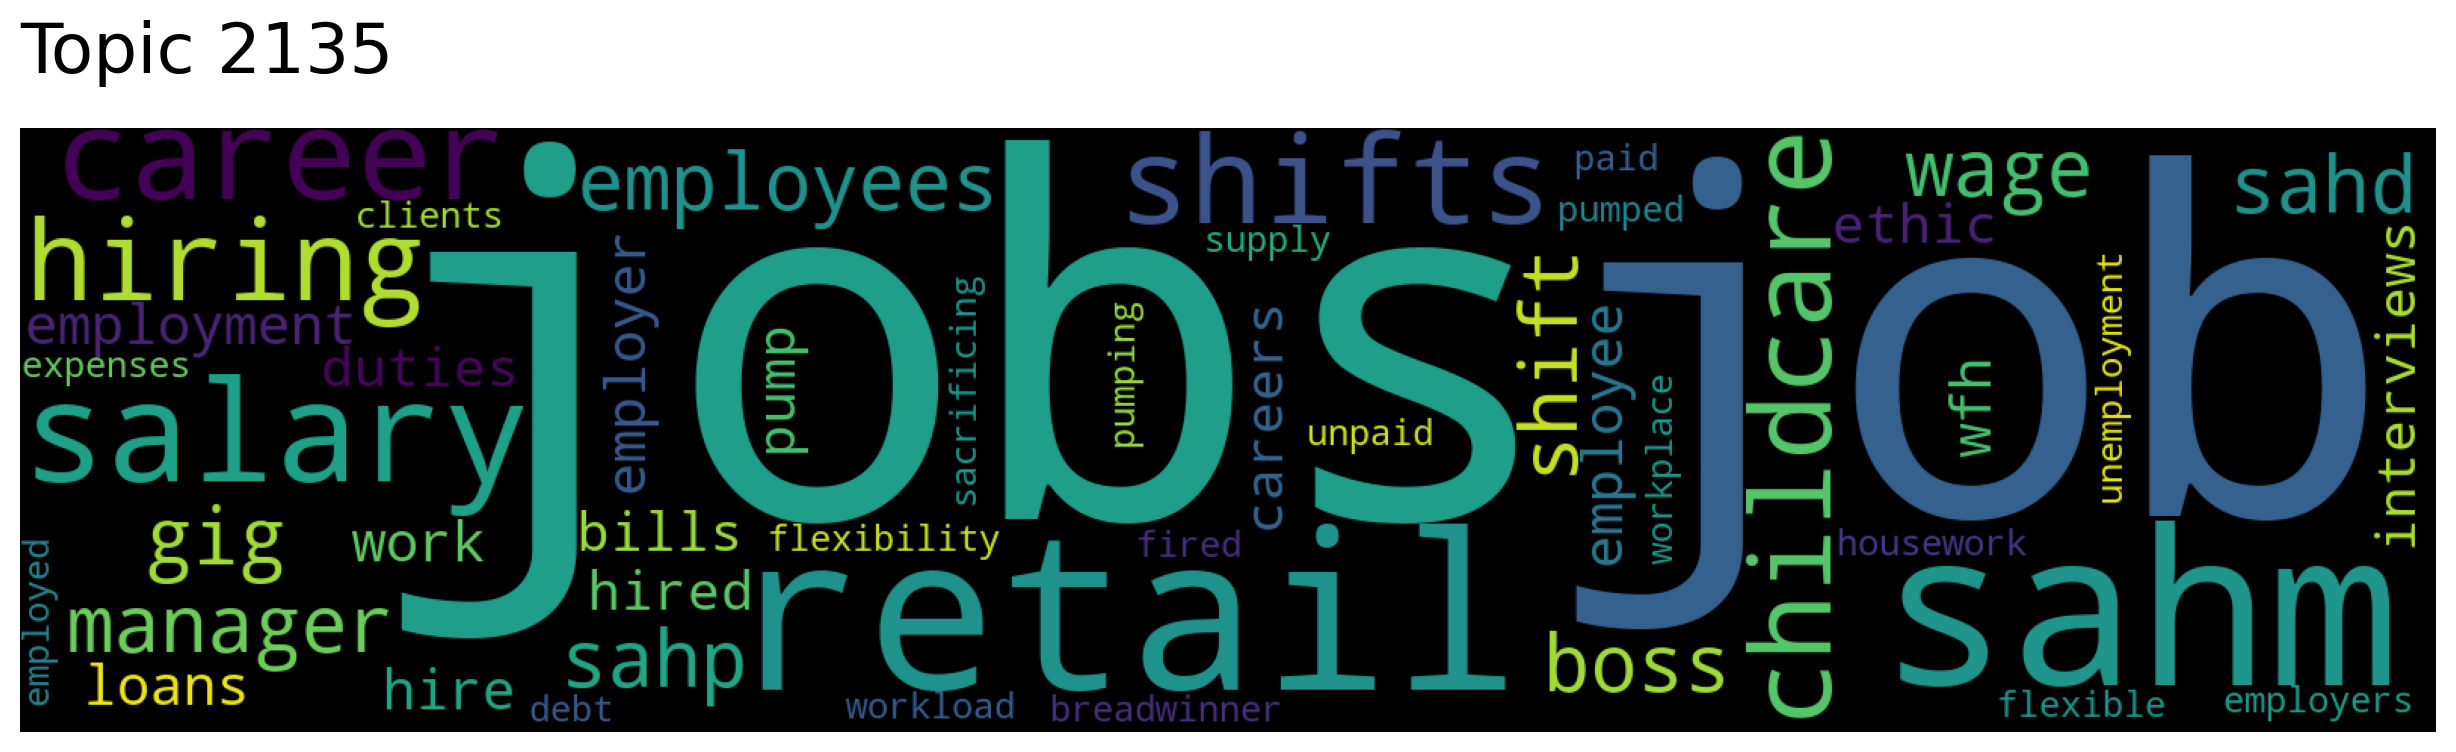

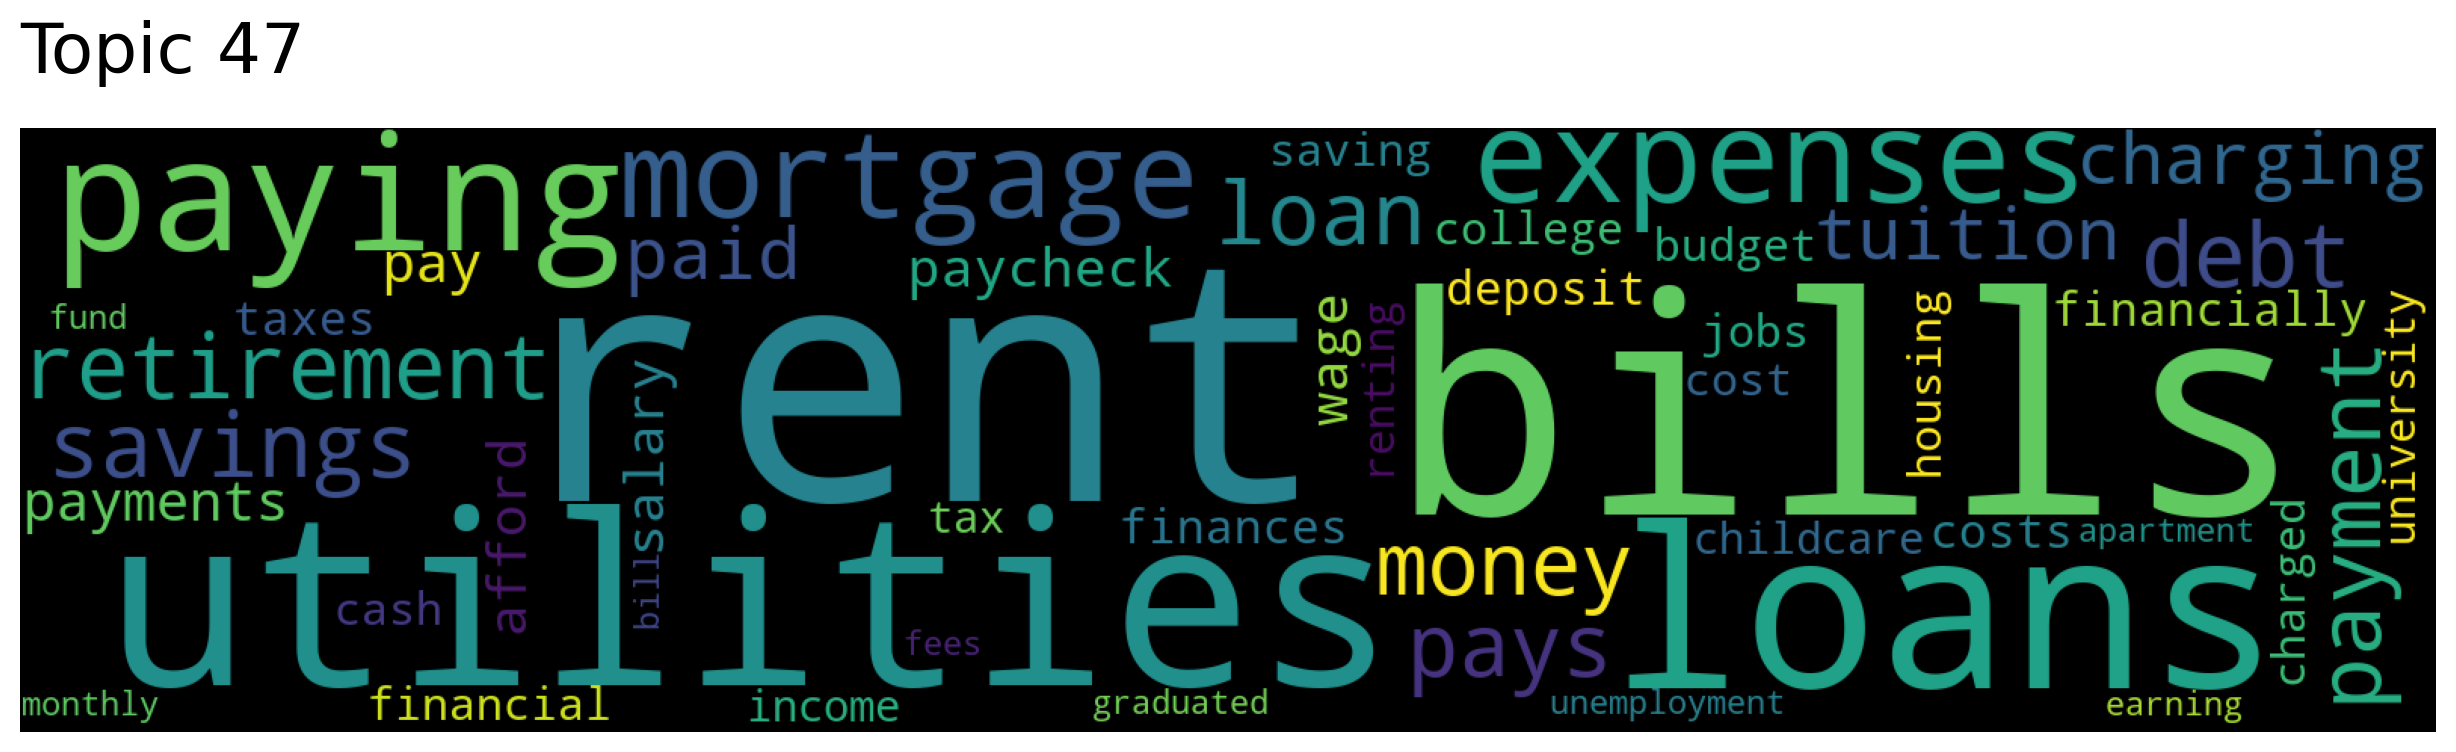

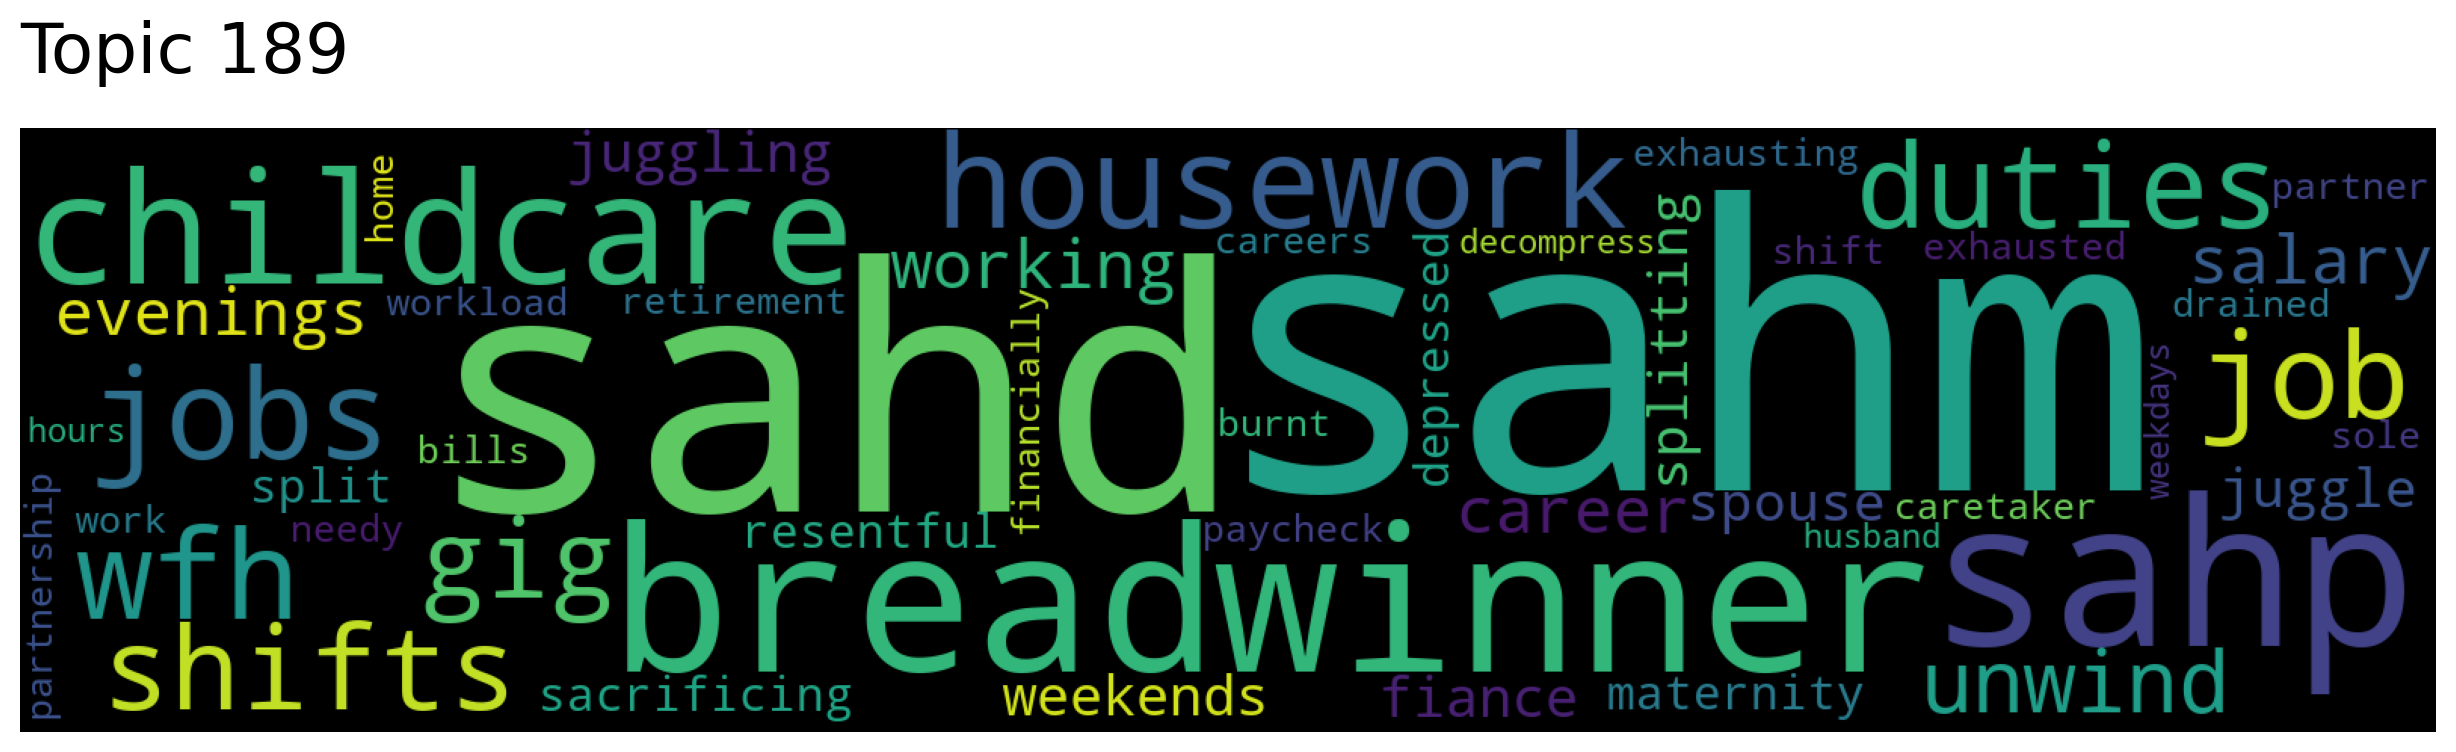

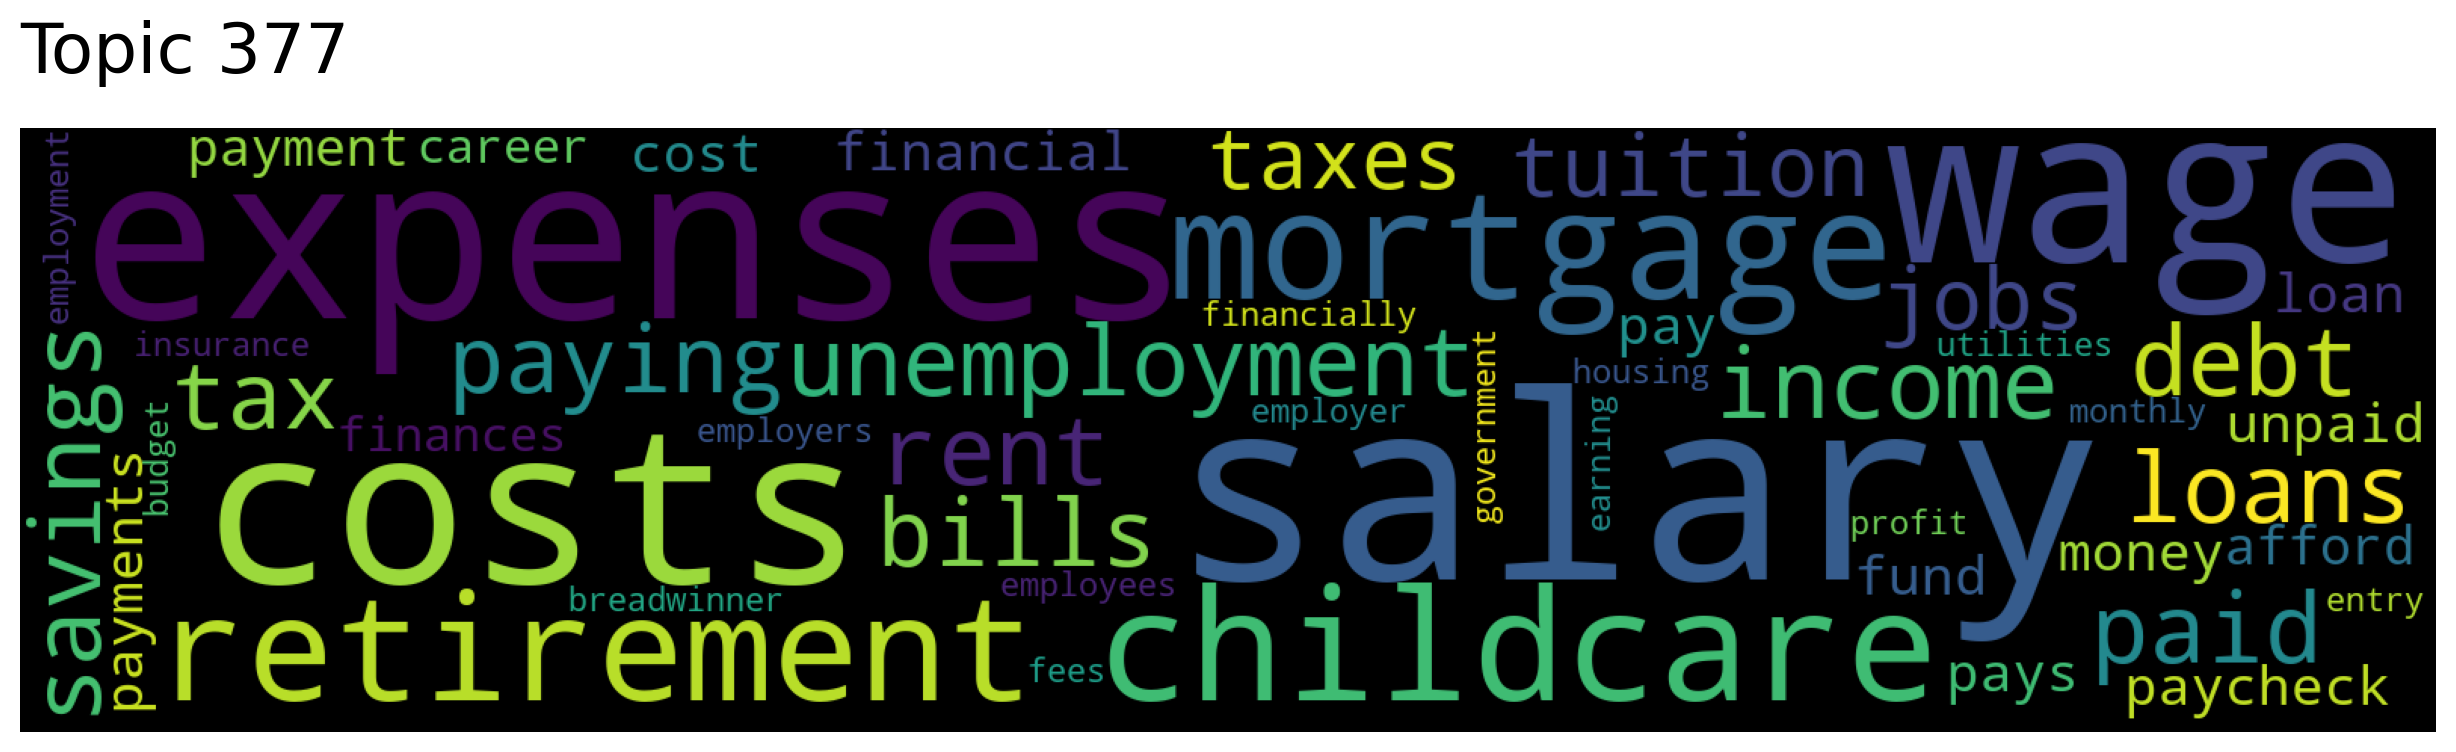

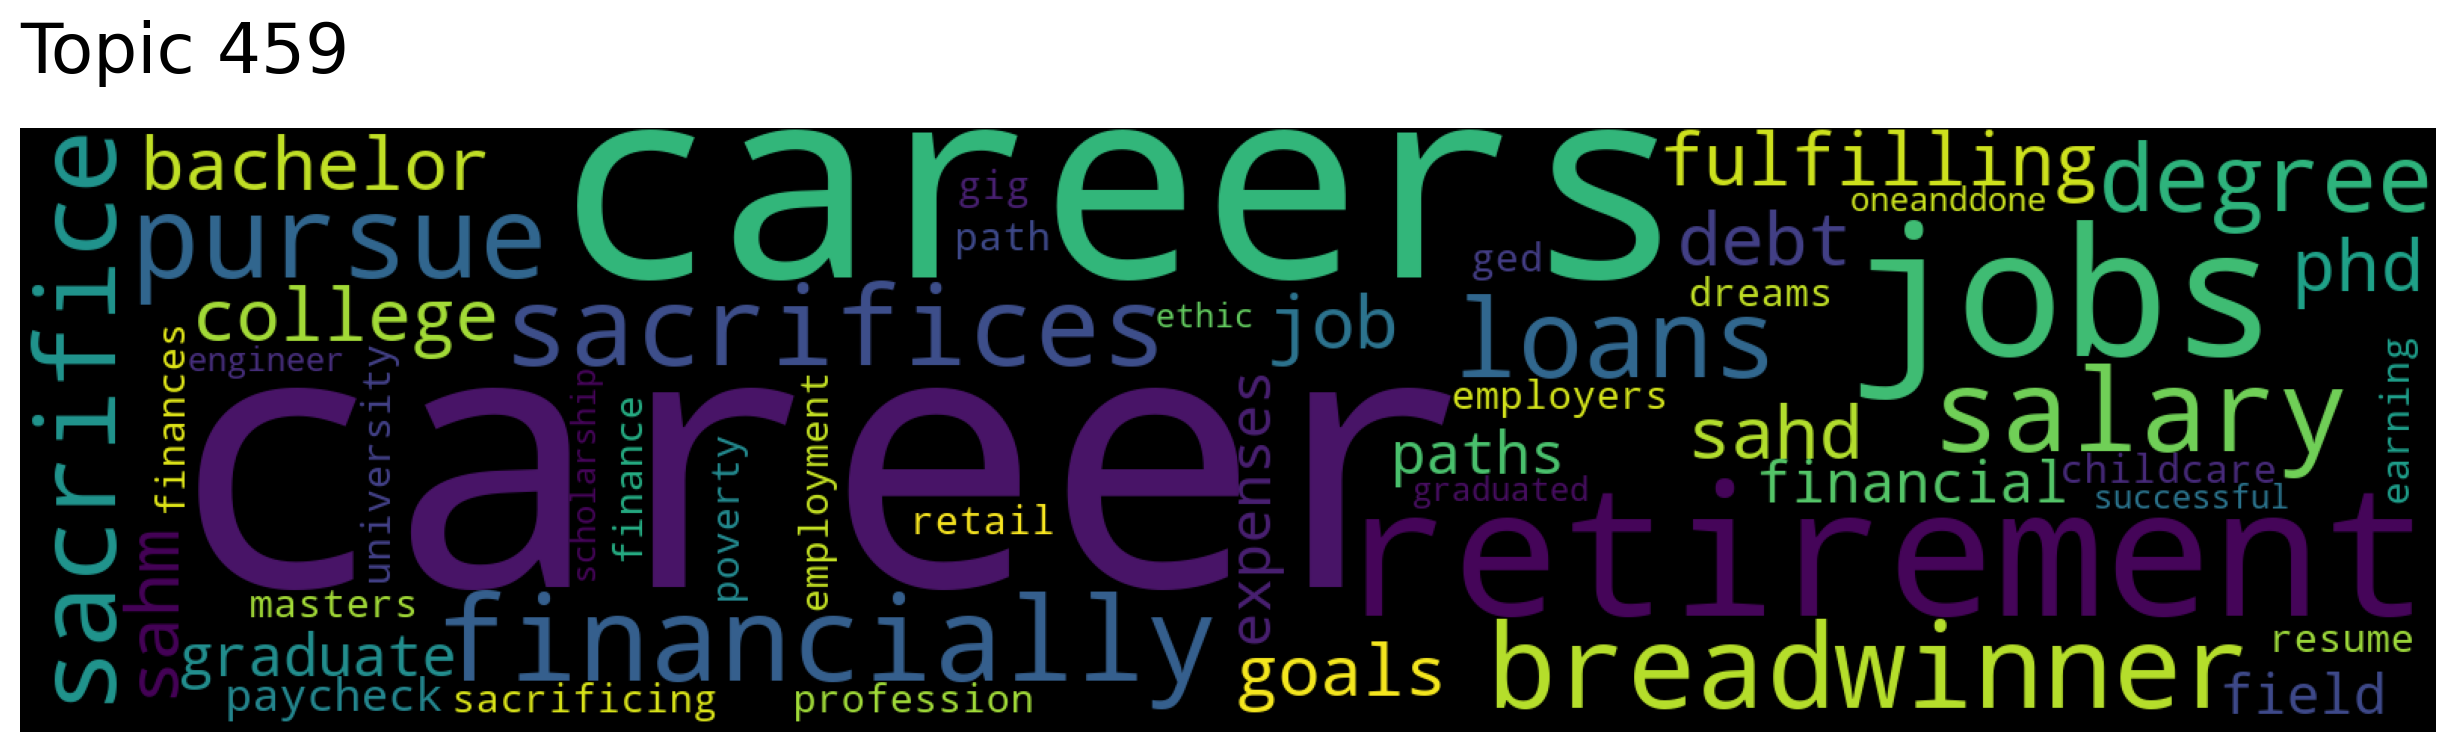

time: 5.3 s


In [35]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["job"], num_topics=5)
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [28]:
words, word_scores = model.similar_words(keywords=["covid"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

distancing 0.7956
visiting 0.7698
global 0.7668
coronavirus 0.7584
accurate 0.7026
closures 0.7022
prevent 0.6973
underfoot 0.6935
occupy 0.6873
explaining 0.6845
backslides 0.6745
flagged 0.6387
megathread 0.634
join 0.6334
coping 0.6311
discussions 0.6288
concerns 0.6251
educational 0.6175
incorrectly 0.6113
tips 0.5886
time: 5.01 ms


In [ ]:
topic_scores

array([0.4767, 0.2869, 0.2301, 0.2278, 0.2236])

In [ ]:
model.get_topic_sizes(reduced=False)

(array([337, 320, 286, 271, 269, 267, 266, 244, 236, 199, 191, 181, 177,
        170, 170, 160, 147, 144, 139, 135, 134, 131, 121, 120, 117, 114,
        113, 111, 108, 105, 104, 103, 101, 101,  97,  97,  97,  96,  95,
         95,  94,  93,  93,  91,  91,  88,  88,  84,  84,  83,  82,  82,
         82,  80,  79,  77,  77,  76,  76,  75,  73,  73,  72,  71,  71,
         69,  68,  68,  68,  68,  67,  66,  65,  64,  63,  62,  61,  61,
         60,  60,  59,  59,  59,  58,  57,  57,  57,  56,  56,  55,  55,
         55,  55,  54,  54,  54,  53,  52,  51,  50,  49,  49,  49,  49,
         48,  48,  48,  48,  47,  47,  45,  44,  44,  42,  41,  41,  40,
         40,  39,  39,  39,  39,  38,  37,  36,  35,  34,  33,  31,  31]),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  

In [ ]:
import numpy as np 
import pandas as pd 
import json
import os
import ipywidgets as widgets
from IPython.display import clear_output, display
from top2vec import Top2Vec

Label(value='Enter keywords seperated by space: ')

Text(value='covid')

Label(value='Enter negative keywords seperated by space: ')

Text(value='')

Label(value='Choose number of topics: ')

Text(value='5')

Button(description='show topics', style=ButtonStyle())

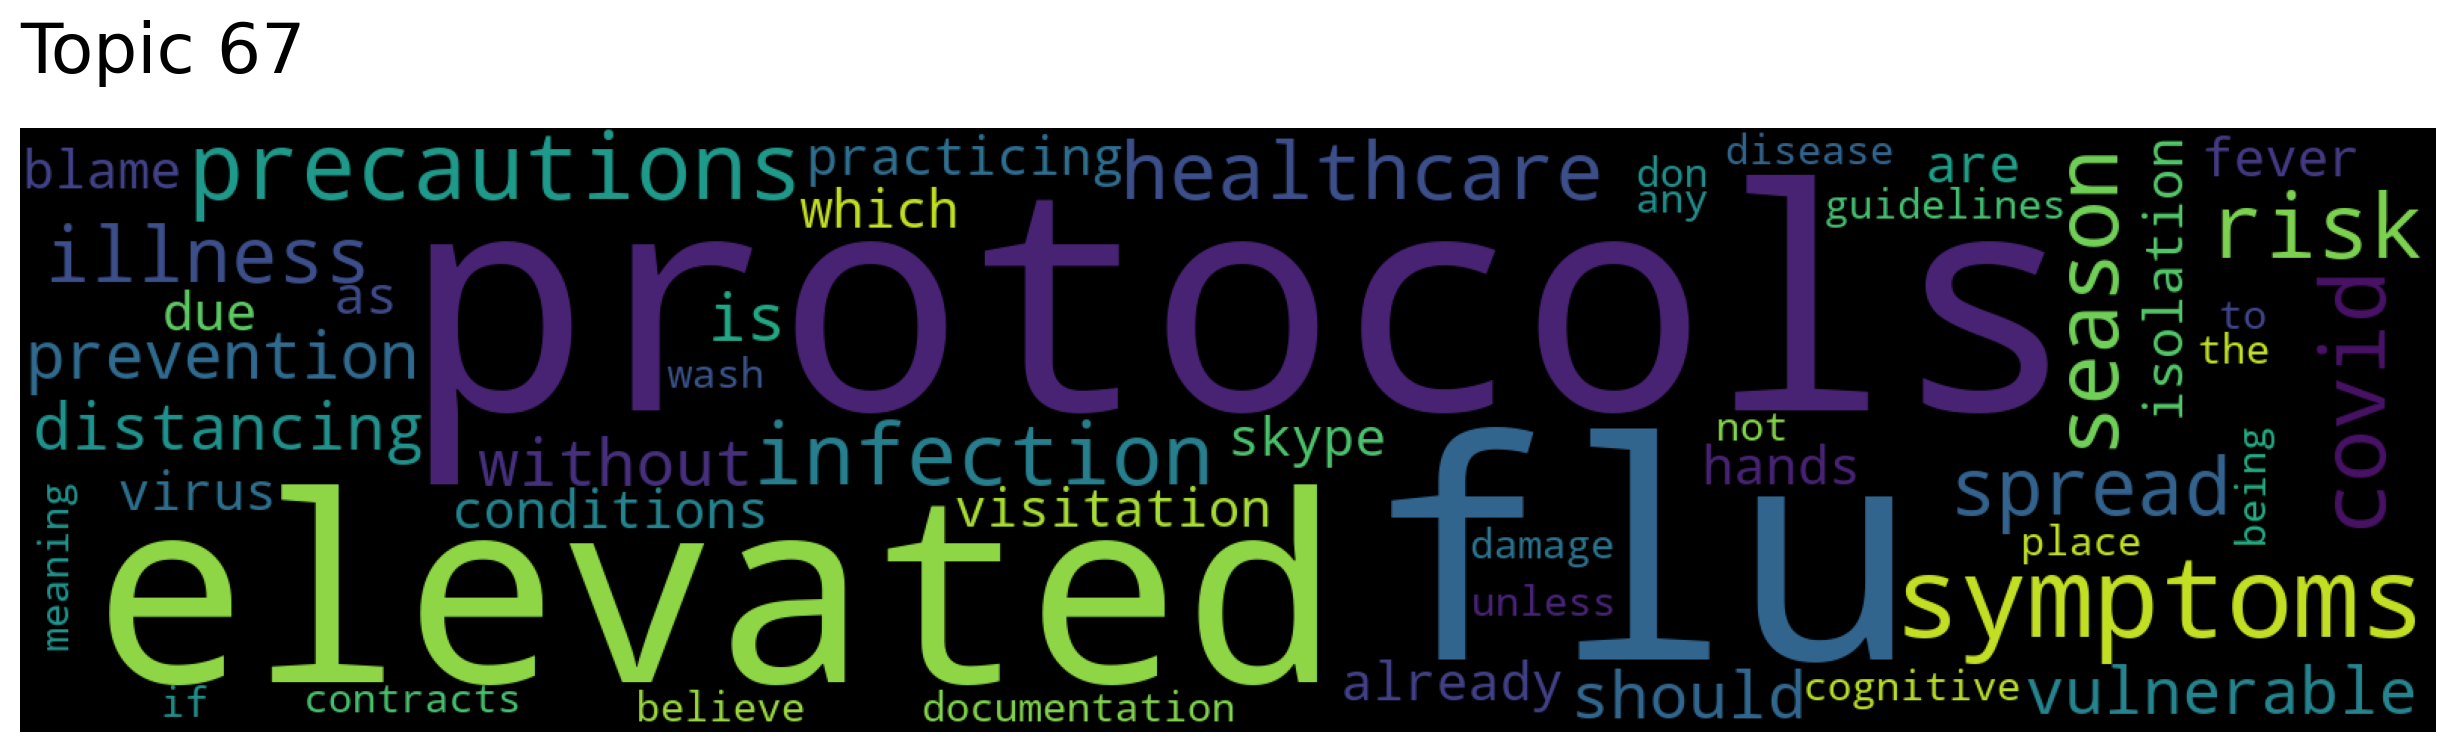

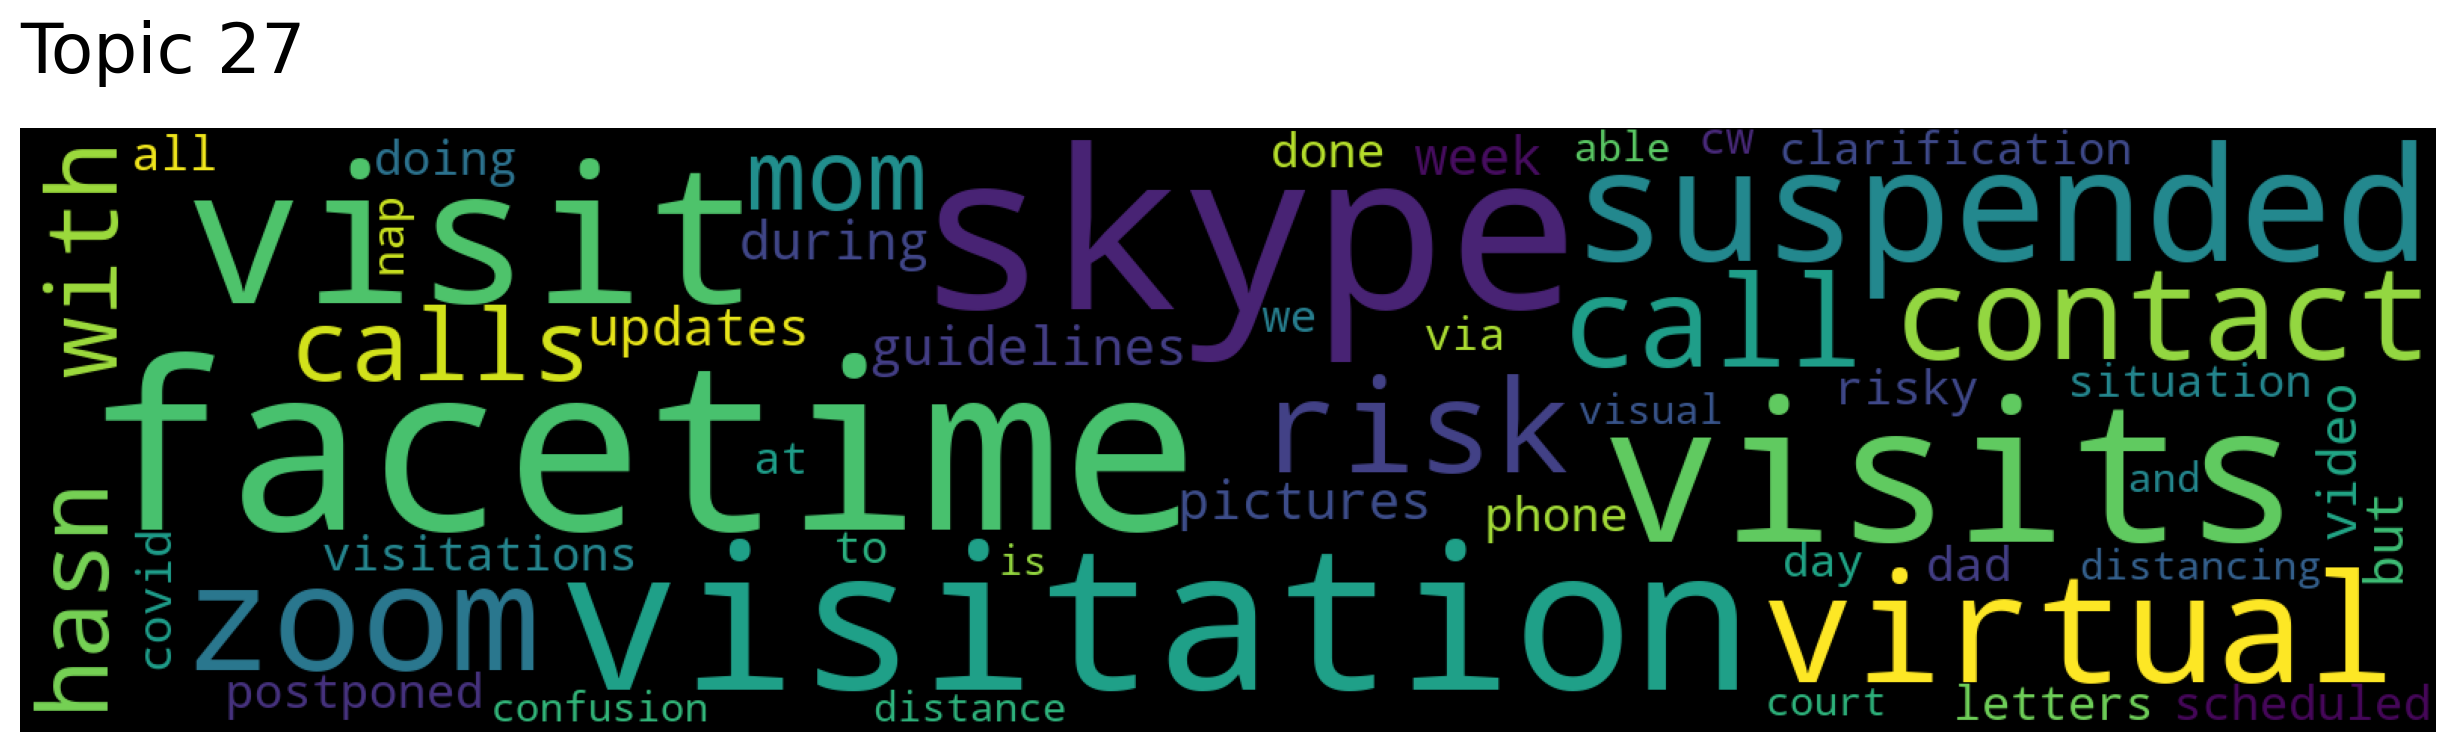

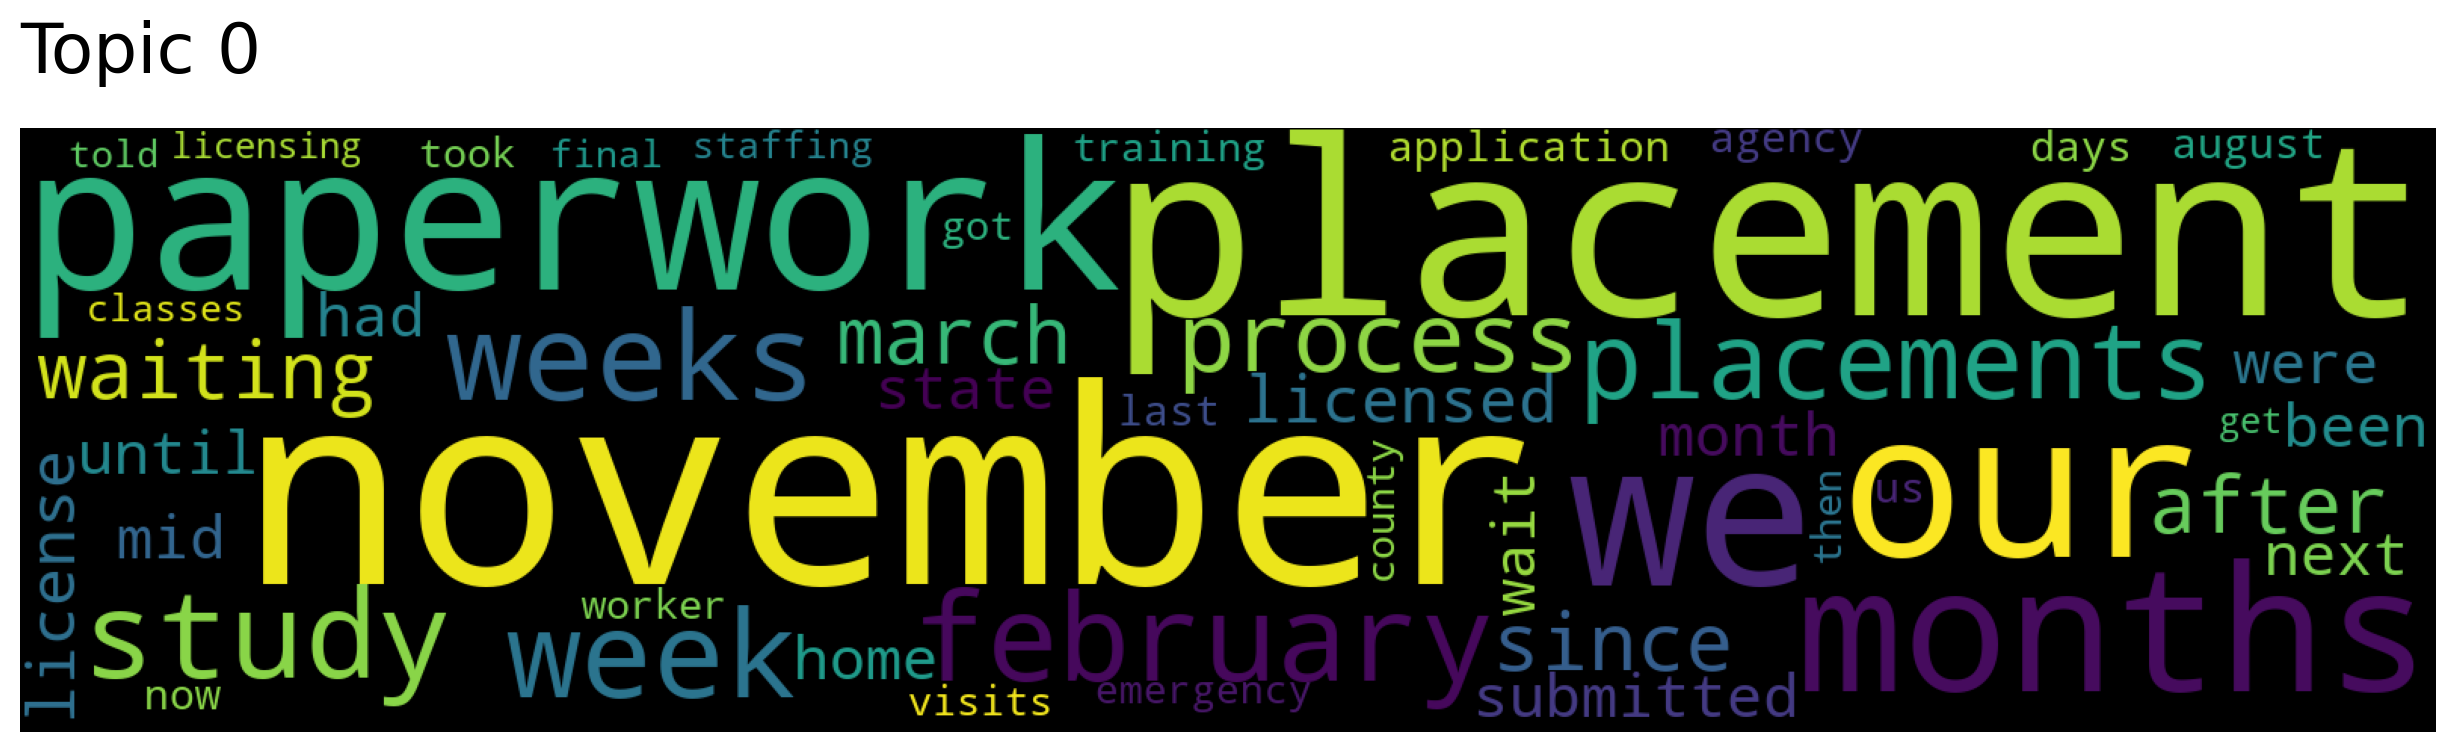

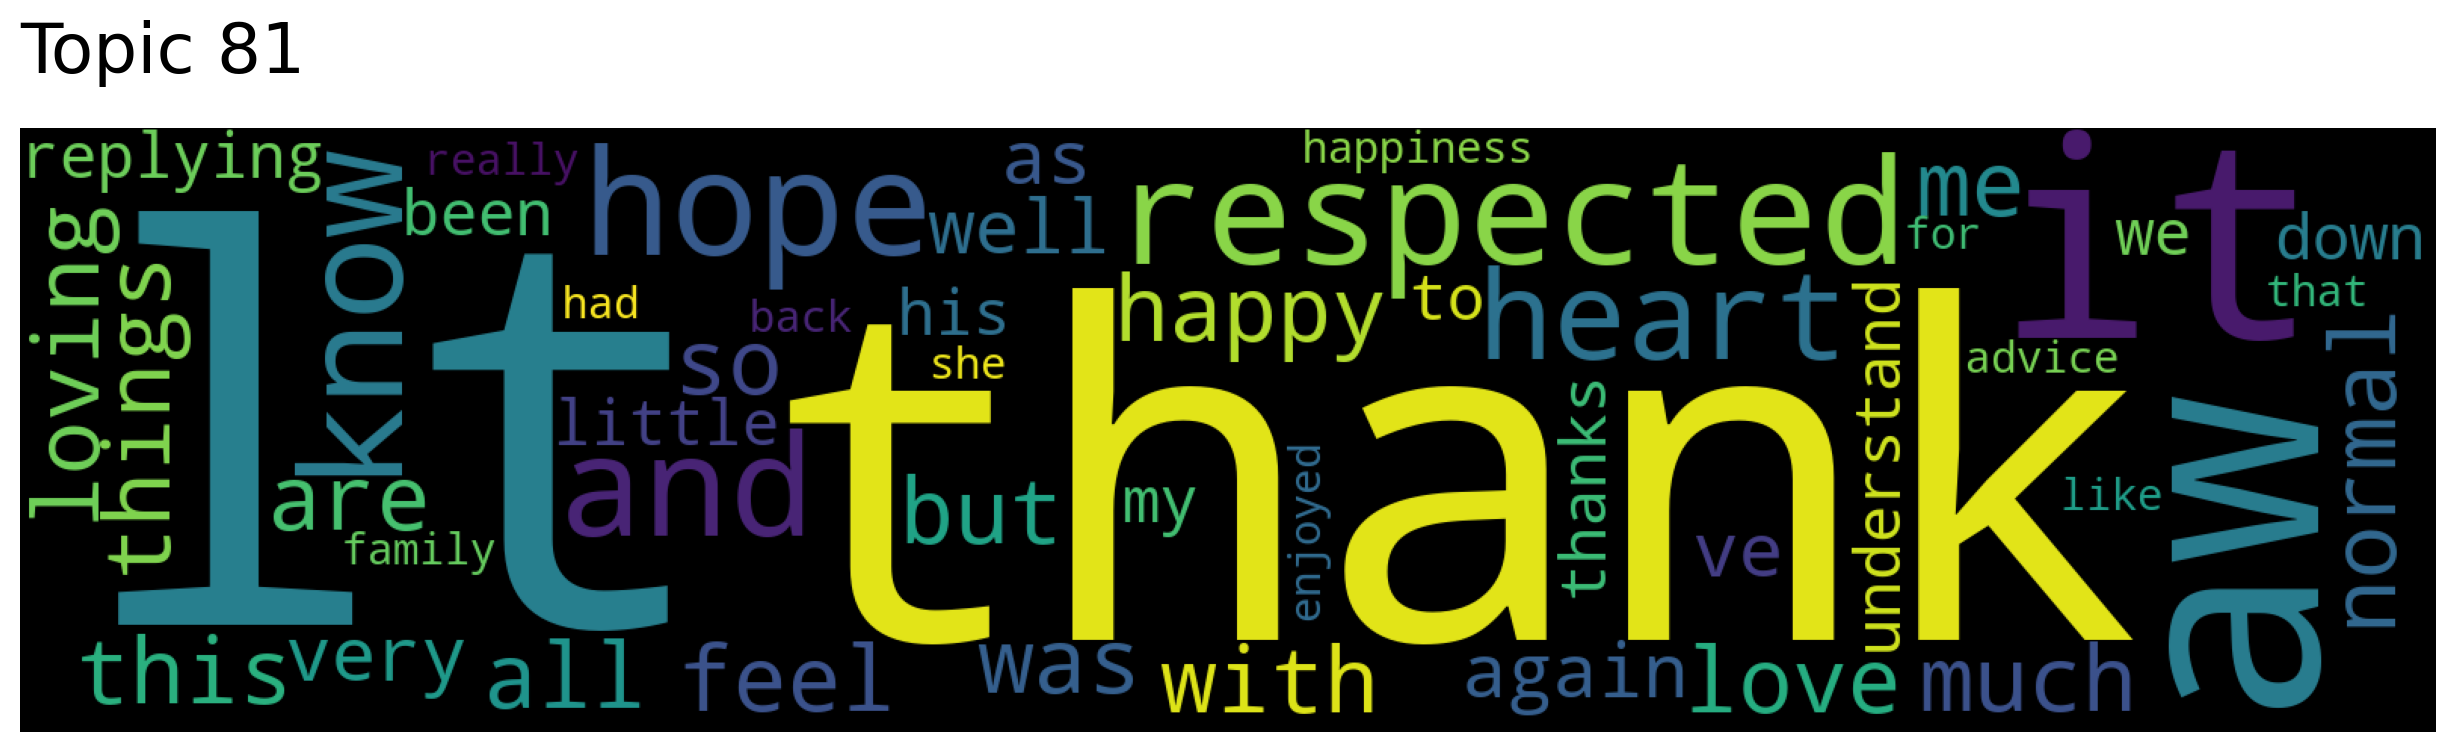

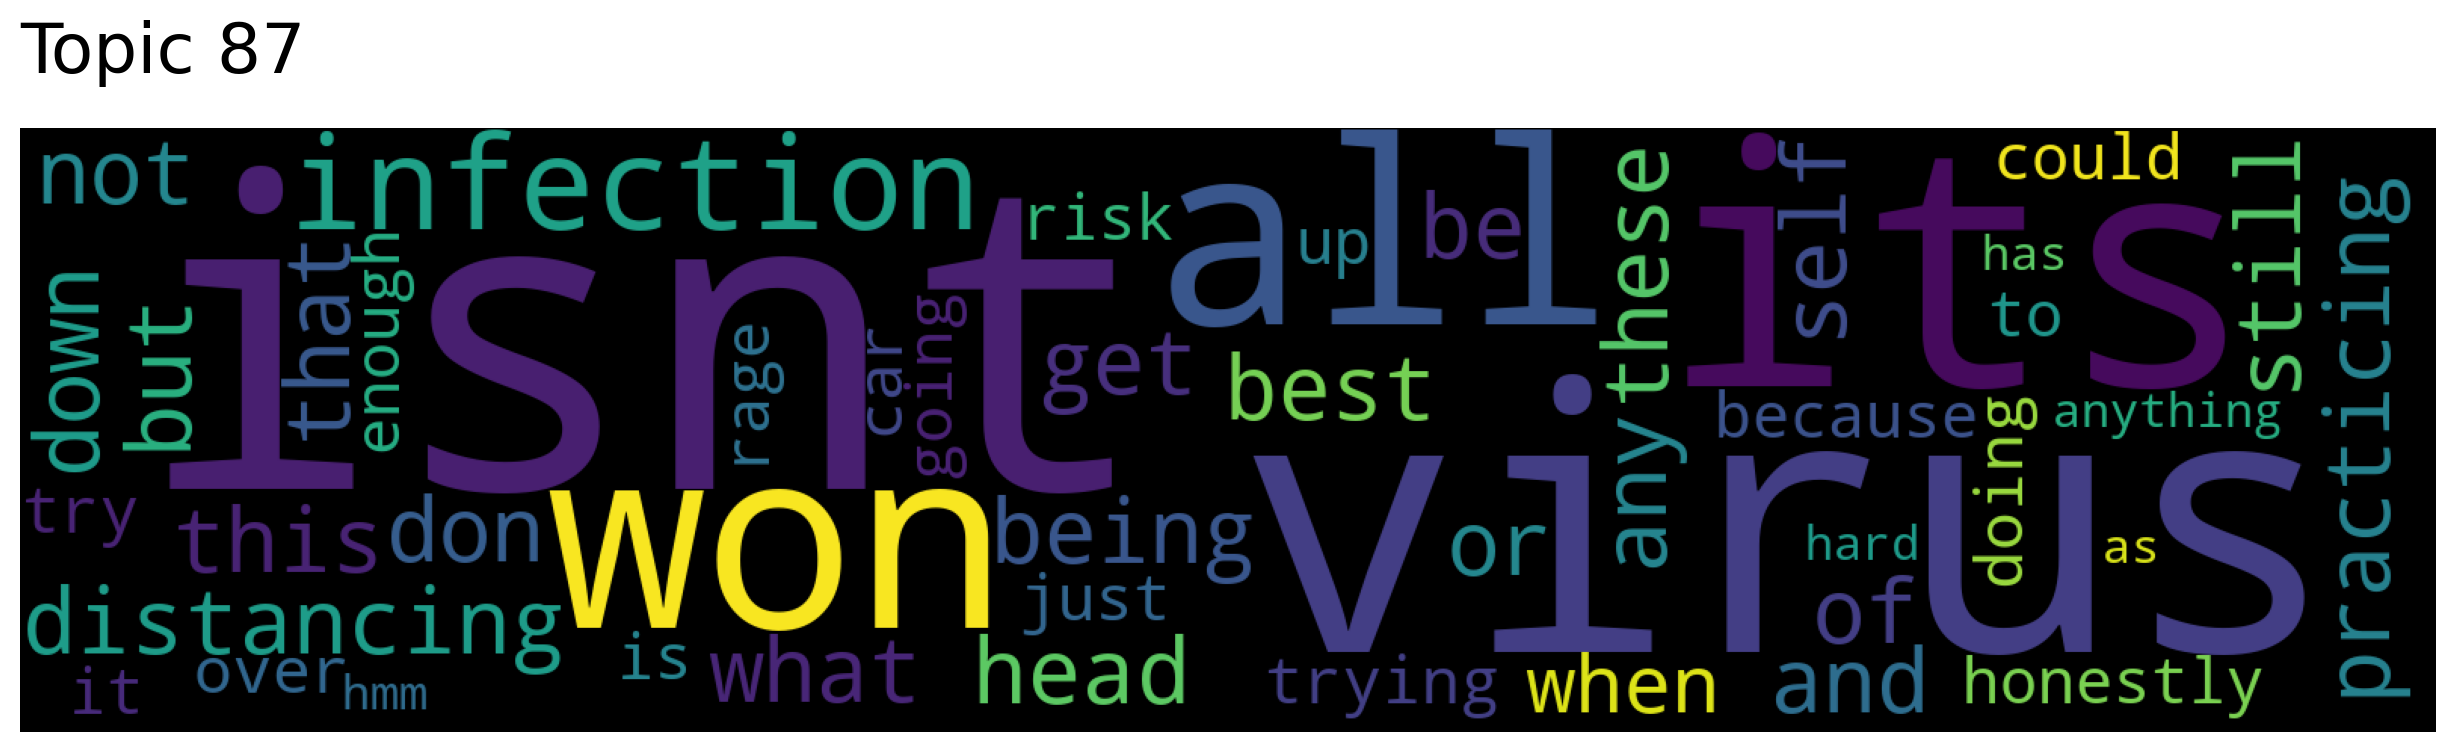

In [ ]:
keywords_select_st = widgets.Label('Enter keywords seperated by space: ')
display(keywords_select_st)

keywords_input_st = widgets.Text()
display(keywords_input_st)

keywords_neg_select_st = widgets.Label('Enter negative keywords seperated by space: ')
display(keywords_neg_select_st)

keywords_neg_input_st = widgets.Text()
display(keywords_neg_input_st)

doc_num_select_st = widgets.Label('Choose number of topics: ')
display(doc_num_select_st)

doc_num_input_st = widgets.Text(value='5')
display(doc_num_input_st)

def display_similar_topics(*args):
    
    clear_output()
    display(keywords_select_st)
    display(keywords_input_st)
    display(keywords_neg_select_st)
    display(keywords_neg_input_st)
    display(doc_num_select_st)
    display(doc_num_input_st)
    display(keyword_btn_st)
    
    try:
        topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=keywords_input_st.value.split(),num_topics=int(doc_num_input_st.value), keywords_neg=keywords_neg_input_st.value.split())
        for topic in topic_nums:
            model.generate_topic_wordcloud(topic, background_color="black")
        
    except Exception as e:
        print(e)
        
keyword_btn_st = widgets.Button(description="show topics")
display(keyword_btn_st)
keyword_btn_st.on_click(display_similar_topics)

